In [263]:
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [264]:
((X_train, y_train), (X_test, y_test)) = mnist.load_data()


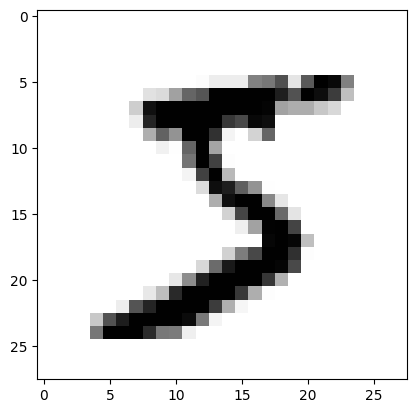

In [265]:
def draw_image(idx):
    plt.imshow(X_train[idx], cmap = plt.cm.binary)
    plt.show()
draw_image(0)


In [266]:
type(X_train)

numpy.ndarray

In [267]:
# Normalize data
X_train = keras.utils.normalize(X_train, axis = 1)
X_test = keras.utils.normalize(X_test, axis = 1)

Y_train = keras.utils.to_categorical(y_train, 10)
Y_test = keras.utils.to_categorical(y_test, 10)

In [268]:
X_train.shape, Y_train.shape

((60000, 28, 28), (60000, 10))

### Model

In [269]:
image_width = 28
image_height = 28
model = keras.Sequential()
#Add input layer
model.add(keras.layers.Input(shape = (image_height, image_width)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation = keras.layers.LeakyReLU(alpha=0.01)))
model.add(keras.layers.Dense(64, activation = keras.layers.LeakyReLU(alpha=0.01)))


model.add(keras.layers.Dense(10, activation = 'softmax'))

In [270]:
print(model.summary())

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 784)               0         
                                                                 
 dense_73 (Dense)            (None, 32)                25120     
                                                                 
 dense_74 (Dense)            (None, 64)                2112      
                                                                 
 dense_75 (Dense)            (None, 10)                650       
                                                                 
Total params: 27882 (108.91 KB)
Trainable params: 27882 (108.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [271]:
# What loss to use? What optimizer to use? What metrics to use?
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.SGD(learning_rate = 0.004), metrics = ['accuracy'])

In [272]:
history = model.fit(X_train, Y_train, epochs = 10, batch_size= 128, validation_data = (X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 2.2595 - accuracy: 0.2483 - val_loss: 2.1935 - val_accuracy: 0.3699
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 2.0964 - accuracy: 0.4321 - val_loss: 1.9678 - val_accuracy: 0.4923
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 1.8086 - accuracy: 0.5787 - val_loss: 1.6179 - val_accuracy: 0.6528
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 1.4350 - accuracy: 0.7055 - val_loss: 1.2417 - val_accuracy: 0.7505
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 1.1020 - accuracy: 0.7659 - val_loss: 0.9622 - val_accuracy: 0.7890
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.8808 - accuracy: 0.7932 - val_loss: 0.7910 - val_accuracy: 0.8122
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.7457 - accuracy: 0.8116 - val_loss: 0.6836 - val_accuracy: 0.8271
Epoch 

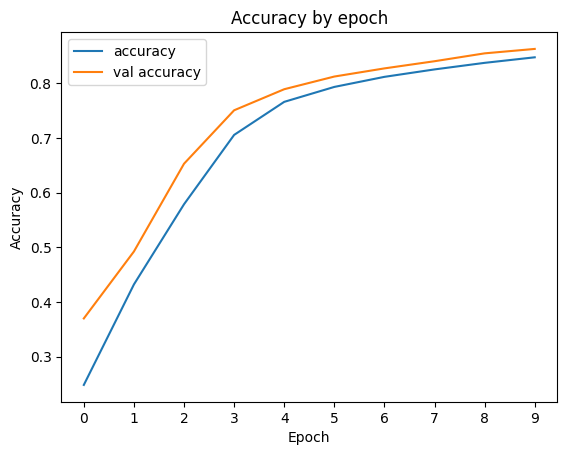

In [273]:
plt.title("Accuracy by epoch")
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(0,10))
plt.legend()

### Inference

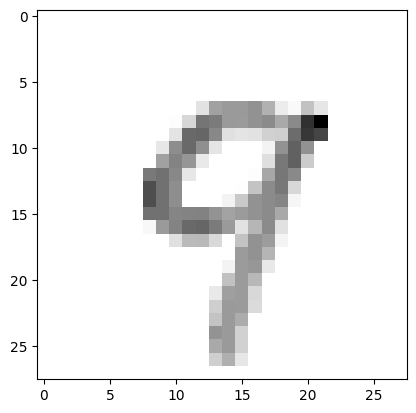

In [274]:
test_image = X_test[12]
plt.imshow(test_image, cmap = plt.cm.binary)